In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

c:\Users\juanp\Desktop\Python\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  75%|███████▌  | 3/4 [00:02<00:00,  1.08 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:08<00:00,  2.08s/ url]


Dataset fashion_mnist downloaded and prepared to C:\Users\juanp\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [3]:
metadatos 

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='C:\\Users\\juanp\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,


In [4]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [5]:
nombres_clases = metadatos.features['label'].names

In [6]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
#nomralizar los datos (pasar de 0-255 a 0-1)
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255 #aqui lo paso de 0-255 a 0-1
    return imagenes, etiquetas

In [8]:
#normalizar los datos de entrenamiento y pruebas con la funcion anterior
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [9]:
#agregar a cache (para que el acceso a los datos sea mas rapido, usar en memoria en lugar de disco)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

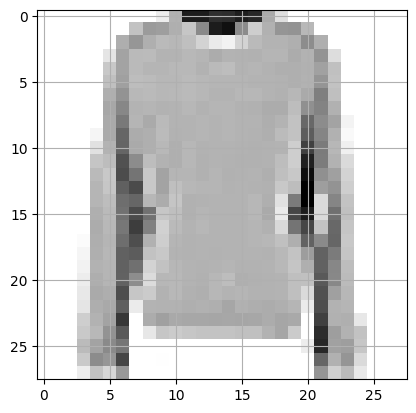

In [11]:
#mostrar una imagen de los datos de prueba, de momento mostramos la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
    break
imagen = imagen.numpy().reshape((28,28)) #redimensionar, cosas de tensores

import matplotlib.pyplot as plt

#dibujar
plt.figure()
plt.imshow(imagen, cmap = plt.cm.binary)
#plt.colobar()
plt.grid()
plt.show()


ver con la categoria correcta con la que viene etiquetada

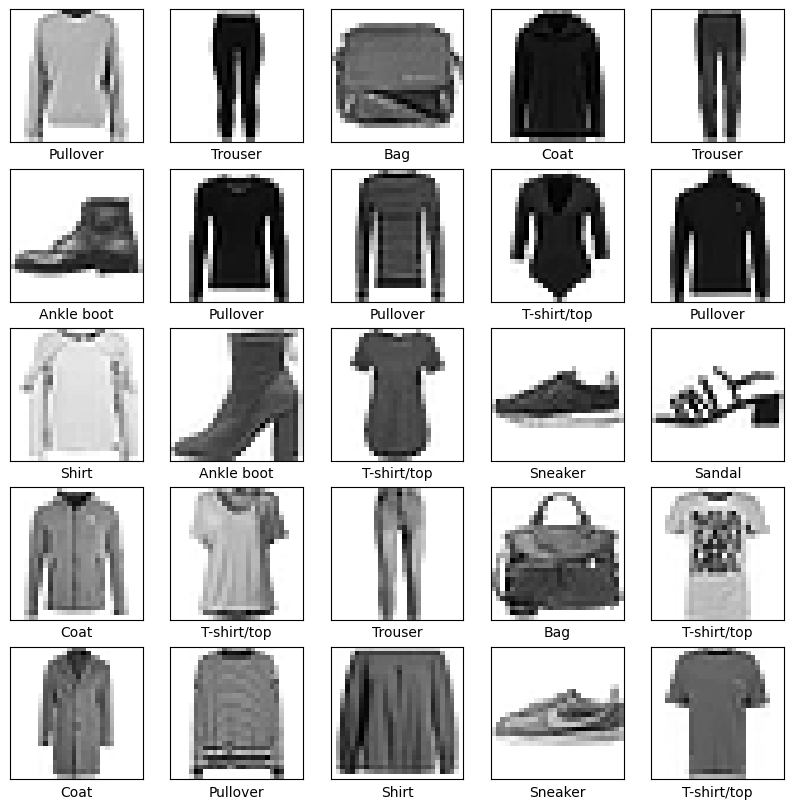

In [12]:
plt.figure(figsize=(10,10))
for i,(imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap = plt.cm.binary)
    plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [13]:
#crear modelo
modelo=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #capa de entrada, aplanar la imagen
    tf.keras.layers.Dense(50, activation='relu'), #capa oculta
    tf.keras.layers.Dense(50, activation='relu'), #capa oculta
    tf.keras.layers.Dense(10, activation='softmax') #capa de salida, 10 neuronas porque son 10 clases
    ])


c:\Users\juanp\Desktop\Python\.conda\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#copilar el modelo
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [15]:
NUM_EJEMPLOS_ENTRENAMIENTO = metadatos.splits['train'].num_examples
NUM_EJEMPLOS_PRUEBAS = metadatos.splits['test'].num_examples

In [16]:
TAMAÑO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.cache().repeat().shuffle(NUM_EJEMPLOS_ENTRENAMIENTO).batch(TAMAÑO_LOTE)
datos_pruebas = datos_pruebas.cache().batch(TAMAÑO_LOTE)

In [19]:
import math
#entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(NUM_EJEMPLOS_ENTRENAMIENTO/TAMAÑO_LOTE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9697 - loss: 0.0802
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9704 - loss: 0.0773
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9697 - loss: 0.0809
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9719 - loss: 0.0769
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9712 - loss: 0.0788


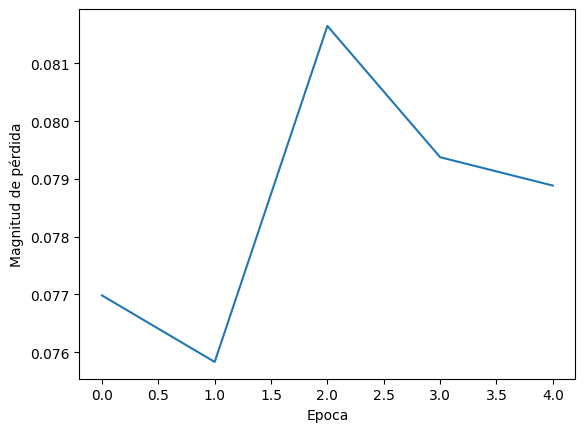

In [20]:
plt.xlabel('Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

nos sirve para imprimir 25 imágenes del set de pruebas y que intente predecir cada uno si predice bien saldrá en una barra azul si predice mal saldrá en rojo 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


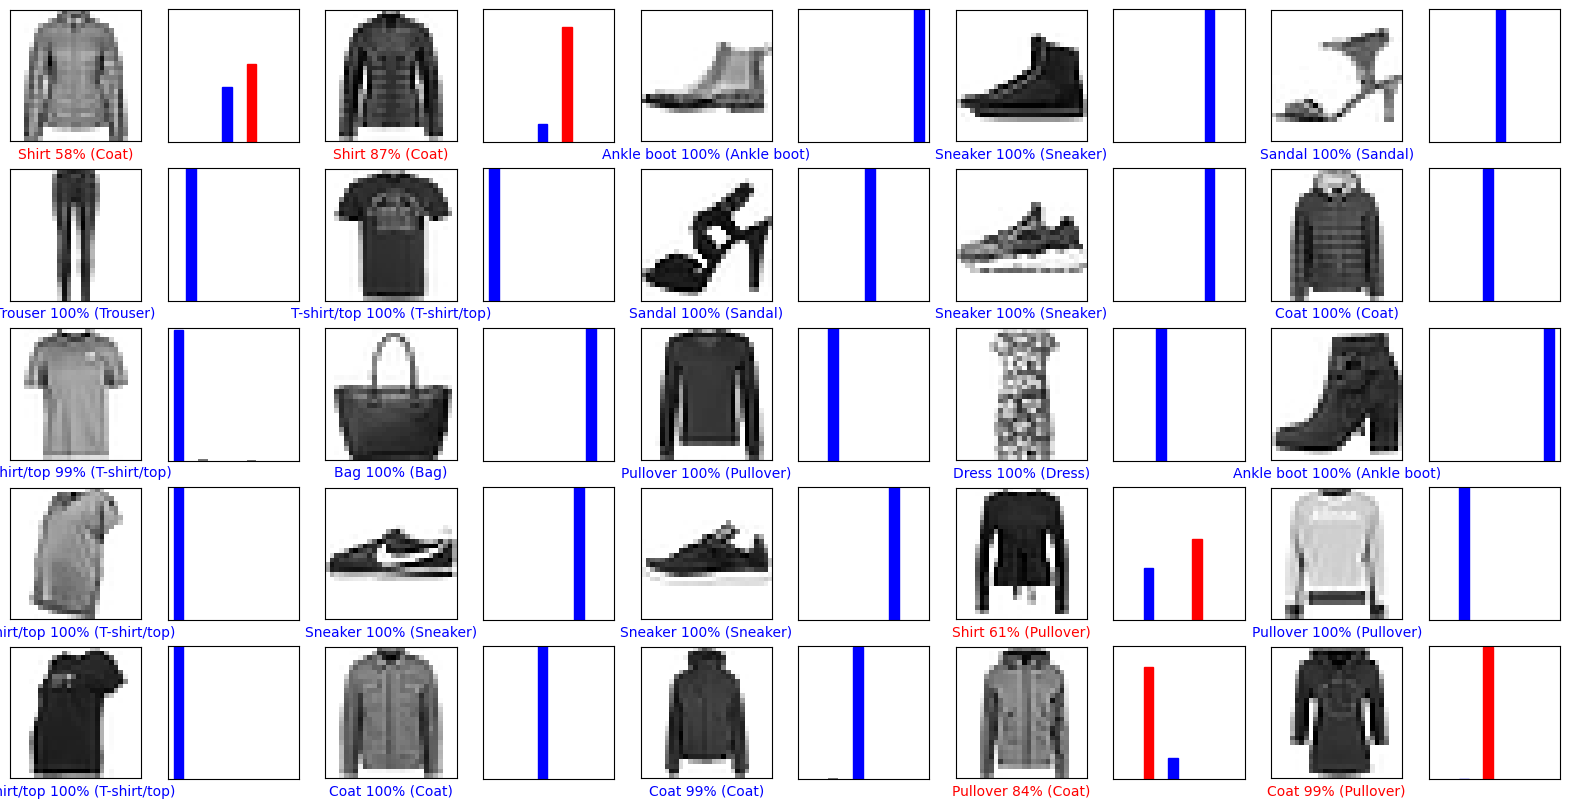

In [21]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [22]:
#Probar una imagen suelta
imagen = imagenes_prueba[4] #AL ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior heheh
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
Prediccion: Sandal


In [23]:
#Exportacion del modelo a h5
modelo.save('modelo_exportado.h5')

#Instalar tensorflowjs para convertir el h5 a un modelo que pueda cargar tensorflowjs en un explorador
!pip install tensorflowjs

#Convertir el archivo h5 a formato de tensorflowjs
!mkdir tfjs_target_dir
!tensorflowjs_converter --input_format keras modelo_exportado.h5 tfjs_target_dir

#Veamos si si creo la carpeta
!ls

#Veamos el contenido de la carpeta
!ls tfjs_target_dir